In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [3]:
data = pd.read_csv('/content/drive/MyDrive/University/Projects/NLP/Dataset/NewsCategory6ClassImbalanced.csv',encoding='UTF-8')
data.head()

,headline,category,newspaper name
0,"হঠাৎ করে কেঁদে ফেললেন ঐশ্বরিয়া রাই, কেন!",Amusement,Jugantor
1,এত দামি জুতা পরেন প্রিয়াঙ্কা!,Amusement,Jugantor
2,মৃত্যুর আগে শ্রীদেবীর শেষ ভিডিও,Amusement,Jugantor
3,কৌতুক অভিনেতা কপিল শর্মার ঘরে নতুন অতিথি,Amusement,Jugantor
4,বিয়ের পর কোহলির জন্য যে ত্যাগ করলেন আনুশকা,Amusement,Jugantor


In [4]:
sample_data = [1000,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,110000,120000,130000]
for i in sample_data:
      print(data.headline[i],'\n','Headline:-- ',data.category[i],'\n')

অভিনয় ছেড়ে ‘পাওভাজি’র দোকান দিচ্ছেন অভিষেক! 
 Headline:--  Amusement 

জামিনে মুক্তি পেলেন ছাত্রদল সভাপতি 
 Headline:--  politics 

দ. কোরিয়ায় ১০০টি খালি কফিন পাঠিয়েছে যুক্তরাষ্ট্র 
 Headline:--  International 

ফ্লোরিডায় হামলাকারী ‘মানসিকভাবে অসুস্থ’: ট্রাম্প 
 Headline:--  International 

সাকিব ফেরালেন শাই হোপকে 
 Headline:--  sports 

তৃতীয়-চতুর্থ শ্রেণির নিয়োগও হবে পিএসসির মাধ্যমে 
 Headline:--  national 

নূরজাহান আমের ওজন আড়াই কেজি 
 Headline:--  International 

ইমরানের আহ্বানে মোদির সাড়া, বৈঠকে বসবেন দুই দেশের পররাষ্ট্রমন্ত্রীরা 
 Headline:--  International 

অবশেষে তালিবানের ওপর প্রভাবের কথা স্বীকার করল পাকিস্তান 
 Headline:--  International 

মার্সেইয়ের জালে পিএসজির গোলউৎসব 
 Headline:--  sports 

কমার্স কলেজের বার্ষিক ক্রীড়া 
 Headline:--  sports 

এবারও ঈদে ছোট পর্দার বড় আকর্ষণ হানিফ সংকেত-এর ইত্যাদি 
 Headline:--  Amusement 

আড়াই বছর ধরে ধর্ষণ 
 Headline:--  national 

বাংলাদেশের নির্বাচনে পর্যবেক্ষক পাঠাবে ভারত 
 Headline:--  national 



In [5]:
# Data cleaning function
def process_headlines(headline): 
    headline = re.sub('[^\u0980-\u09FF]',' ',str(headline)) #removing unnecessary punctuation
    return headline

# Apply the function into the dataframe
data['cleaned'] = data['headline'].apply(process_headlines)  

# print some cleaned reviews from the dataset
sample_data = [10,100,25,854,966,1500,1589,1700,2000,2500,4000,4500]
for i in sample_data:
     print('Original:\n',data.headline[i],'\nCleaned:\n',
           data.cleaned[i],'\n','Sentiment:-- ',data.category[i],'\n')

# Length of each headlines
data['length'] = data['cleaned'].apply(lambda x:len(x.split()))
# Remove the headlines with least words
dataset = data.loc[data.length>2]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small Headlines".format(len(data)-len(dataset)),
      "\nTotal Headlines:",len(dataset))
data.head(10)

Original:
 মোদির পাশে তৈমুর! 
Cleaned:
 মোদির পাশে তৈমুর  
 Sentiment:--  Amusement 

Original:
 দেখতে পারেন শ্রীদেবীর সেরা ৪ ছবি (ভিডিও) 
Cleaned:
 দেখতে পারেন শ্রীদেবীর সেরা ৪ ছবি  ভিডিও  
 Sentiment:--  Amusement 

Original:
 নতুন রূপে কঙ্গনা 
Cleaned:
 নতুন রূপে কঙ্গনা 
 Sentiment:--  Amusement 

Original:
 মুক্তির আগেই ৩৭০ কোটি টাকা আয় করল রোবটের সিকোয়্যাল ২.০ 
Cleaned:
 মুক্তির আগেই ৩৭০ কোটি টাকা আয় করল রোবটের সিকোয়্যাল ২ ০ 
 Sentiment:--  Amusement 

Original:
 সানি লিওনের বাড়ি যেন জুতোর দোকান! 
Cleaned:
 সানি লিওনের বাড়ি যেন জুতোর দোকান  
 Sentiment:--  Amusement 

Original:
 সেই মডেল প্রিয়াঙ্কা লাইফ সাপোর্টে 
Cleaned:
 সেই মডেল প্রিয়াঙ্কা লাইফ সাপোর্টে 
 Sentiment:--  Amusement 

Original:
 ধারাবাহিকে ব্যস্ত রুনা খান 
Cleaned:
 ধারাবাহিকে ব্যস্ত রুনা খান 
 Sentiment:--  Amusement 

Original:
 ‘হাজীর বিরিয়ানি’ নিয়ে সিয়াম 
Cleaned:
  হাজীর বিরিয়ানি  নিয়ে সিয়াম 
 Sentiment:--  Amusement 

Original:
 ক্ষমা চেয়েও মুক্তি পেলেন না পরিচালক গাজী মাহবুব 
Cleaned:
 ক্ষমা চেয়েও মুক্তি পেল

,headline,category,newspaper name,cleaned,length
0,"হঠাৎ করে কেঁদে ফেললেন ঐশ্বরিয়া রাই, কেন!",Amusement,Jugantor,হঠাৎ করে কেঁদে ফেললেন ঐশ্বরিয়া রাই কেন,7
1,এত দামি জুতা পরেন প্রিয়াঙ্কা!,Amusement,Jugantor,এত দামি জুতা পরেন প্রিয়াঙ্কা,5
2,মৃত্যুর আগে শ্রীদেবীর শেষ ভিডিও,Amusement,Jugantor,মৃত্যুর আগে শ্রীদেবীর শেষ ভিডিও,5
3,কৌতুক অভিনেতা কপিল শর্মার ঘরে নতুন অতিথি,Amusement,Jugantor,কৌতুক অভিনেতা কপিল শর্মার ঘরে নতুন অতিথি,7
4,বিয়ের পর কোহলির জন্য যে ত্যাগ করলেন আনুশকা,Amusement,Jugantor,বিয়ের পর কোহলির জন্য যে ত্যাগ করলেন আনুশকা,8
5,মোহিনী নাচের জাদুতে আগুন জ্বালালেন ঊর্বশী! (ভি...,Amusement,Jugantor,মোহিনী নাচের জাদুতে আগুন জ্বালালেন ঊর্বশী ভি...,7
6,প্রতারণা মামলায় সোনাক্ষীকে খুঁজছে পুলিশ,Amusement,Jugantor,প্রতারণা মামলায় সোনাক্ষীকে খুঁজছে পুলিশ,5
7,"‘ভালো অভিনেত্রী নয়, মা আদর্শ মানুষ হওয়ার পাঠ দ...",Amusement,Jugantor,ভালো অভিনেত্রী নয় মা আদর্শ মানুষ হওয়ার পাঠ দ...,9
8,এবার শুটিং সেটে সালমানকে হত্যাচেষ্টা,Amusement,Jugantor,এবার শুটিং সেটে সালমানকে হত্যাচেষ্টা,5
9,"শ্রীদেবীর মৃত্যুর ‘তদন্ত শেষ’, মৃতদেহ হস্তান্তর",Amusement,Jugantor,শ্রীদেবীর মৃত্যুর তদন্ত শেষ মৃতদেহ হস্তান্তর,6


**Feature Vector Function**

In [6]:
def calc_gram_tfidf(headline,gram):

    tfidf = TfidfVectorizer(ngram_range=gram,use_idf=True,tokenizer=lambda x: x.split(),max_features=100000) 
    X = tfidf.fit_transform(headline)
    
    return tfidf,X

**Label Encoding Function**

In [7]:
def label_encoding(category,bool):
    le = LabelEncoder()
    le.fit(category)
    encoded_labels = le.transform(category)
    labels = np.array(encoded_labels) # Converting into numpy array
    class_names =le.classes_ ## Define the class names again
    if bool == True:
        print("\n\t\t\t===== Label Encoding =====","\nClass Names:-->",le.classes_)
        for i in sample_data:
            print(category[i],' ', encoded_labels[i],'\n')

    return labels

**Dataset Splitting Function**

In [8]:
def dataset_split(feature_space,category):

    X_train,X_test,y_train,y_test = train_test_split(feature_space,category,train_size = 0.9,
                                                  test_size = 0.1,random_state =0)
    print("Feature Size :======>",X_train.shape[1])
    print("\nDataset Distribution:\n")
    print("\tSet Name","\t\tSize")
    print("\t========\t\t======")

    print("\tFull\t\t\t",feature_space.shape[0],
        "\n\tTraining\t\t",X_train.shape[0],
        "\n\tTest\t\t\t",X_test.shape[0])
  
    return X_train,X_test,y_train,y_test

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve

**01. Trigram Classification**

In [10]:
tfidf,feature = calc_gram_tfidf(data.cleaned,(1,3))
labels = label_encoding(data.category,False)
X_train,X_test,y_train,y_test = dataset_split(feature,labels)

Feature Size :======> 100000

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 136811 
	Training		 123129 
	Test			 13682


**01.01 Logistic Regression**

In [ ]:
lr_model = LogisticRegression(solver = 'lbfgs', max_iter= 400, random_state = 123)
lr_model.fit(X_train,y_train)
pred_y = lr_model.predict(X_test)

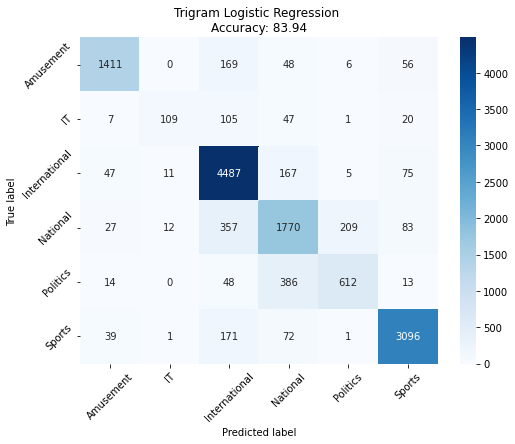

In [ ]:
cm = confusion_matrix(y_test, pred_y) 
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     
                     index = ['Amusement' ,'IT' ,'International', 'National', 'Politics', 'Sports'], 
                     columns = ['Amusement' ,'IT' ,'International', 'National', 'Politics', 'Sports'])

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,cmap="Blues", fmt='g')
plt.title('Trigram Logistic Regression \nAccuracy: {0:.2f}'.format(accuracy_score(y_test, pred_y)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

In [ ]:
report = pd.DataFrame(classification_report(y_true = y_test, y_pred = pred_y, output_dict=True)).transpose()
report = report.rename(index={'0': 'Amusement','1':'IT','2':'International','3':'National','4':'Politics','5':'Sports'})
report[['precision','recall','f1-score']]=report[['precision','recall','f1-score']].apply(lambda x: round(x*100,2))
report

,precision,recall,f1-score,support
Amusement,91.33,83.49,87.23,1690.000000
IT,81.95,37.72,51.66,289.000000
International,84.07,93.64,88.60,4792.000000
National,71.08,72.01,71.54,2458.000000
Politics,73.38,57.04,64.18,1073.000000
Sports,92.61,91.60,92.10,3380.000000
accuracy,83.94,83.94,83.94,0.839424
macro avg,82.41,72.58,75.89,13682.000000
weighted avg,83.86,83.94,83.54,13682.000000


**01.02 Decision Tree Classifier**

In [ ]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt_model.fit(X_train,y_train)
pred_y = dt_model.predict(X_test)

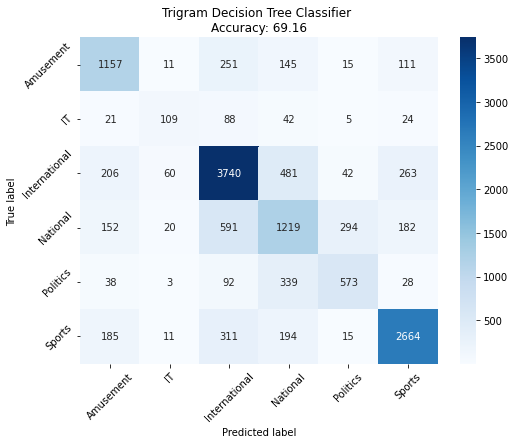

In [ ]:
cm = confusion_matrix(y_test, pred_y) 
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     
                     index = ['Amusement' ,'IT' ,'International', 'National', 'Politics', 'Sports'], 
                     columns = ['Amusement' ,'IT' ,'International', 'National', 'Politics', 'Sports'])

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,cmap="Blues", fmt='g')
plt.title('Trigram Decision Tree Classifier \nAccuracy: {0:.2f}'.format(accuracy_score(y_test, pred_y)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

In [ ]:
report = pd.DataFrame(classification_report(y_true = y_test, y_pred = pred_y, output_dict=True)).transpose()
report = report.rename(index={'0': 'Amusement','1':'IT','2':'International','3':'National','4':'Politics','5':'Sports'})
report[['precision','recall','f1-score']]=report[['precision','recall','f1-score']].apply(lambda x: round(x*100,2))
report

,precision,recall,f1-score,support
Amusement,65.78,68.46,67.09,1690.000000
IT,50.93,37.72,43.34,289.000000
International,73.72,78.05,75.82,4792.000000
National,50.37,49.59,49.98,2458.000000
Politics,60.70,53.40,56.82,1073.000000
Sports,81.42,78.82,80.10,3380.000000
accuracy,69.16,69.16,69.16,0.691566
macro avg,63.82,61.01,62.19,13682.000000
weighted avg,68.94,69.16,68.98,13682.000000


**01.03 Random Forest Classifier**

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, criterion ='entropy', random_state = 0)
rf_model.fit(X_train,y_train)
pred_y = rf_model.predict(X_test)

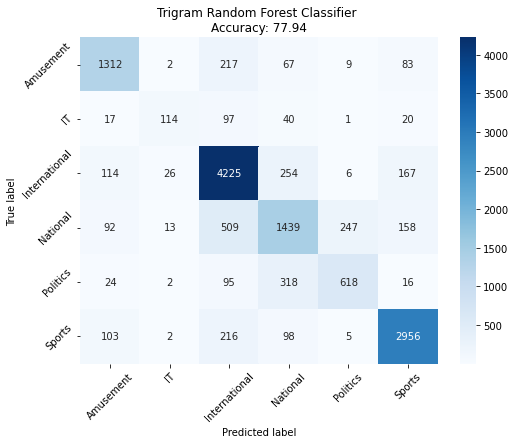

In [ ]:
cm = confusion_matrix(y_test, pred_y) 
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     
                     index = ['Amusement' ,'IT' ,'International', 'National', 'Politics', 'Sports'], 
                     columns = ['Amusement' ,'IT' ,'International', 'National', 'Politics', 'Sports'])

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,cmap="Blues", fmt='g')
plt.title('Trigram Random Forest Classifier \nAccuracy: {0:.2f}'.format(accuracy_score(y_test, pred_y)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

In [ ]:
report = pd.DataFrame(classification_report(y_true = y_test, y_pred = pred_y, output_dict=True)).transpose()
report = report.rename(index={'0': 'Amusement','1':'IT','2':'International','3':'National','4':'Politics','5':'Sports'})
report[['precision','recall','f1-score']]=report[['precision','recall','f1-score']].apply(lambda x: round(x*100,2))
report

,precision,recall,f1-score,support
Amusement,78.94,77.63,78.28,1690.000000
IT,71.70,39.45,50.89,289.000000
International,78.84,88.17,83.24,4792.000000
National,64.94,58.54,61.57,2458.000000
Politics,69.75,57.60,63.09,1073.000000
Sports,86.94,87.46,87.20,3380.000000
accuracy,77.94,77.94,77.94,0.779418
macro avg,75.18,68.14,70.71,13682.000000
weighted avg,77.49,77.94,77.45,13682.000000


**01.04 Multinomial Naive Bayes**

In [ ]:
mnb_model = MultinomialNB(alpha=0.15)
mnb_model.fit(X_train,y_train)
pred_y = mnb_model.predict(X_test)

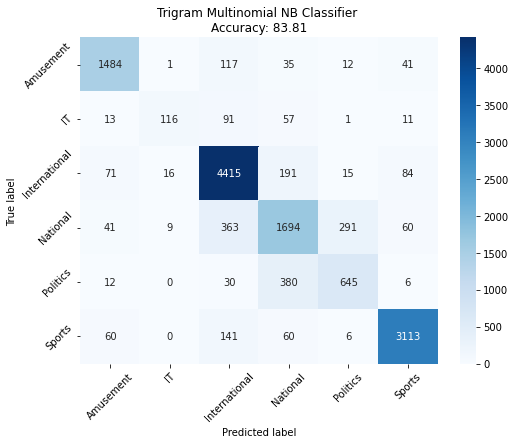

In [ ]:
cm = confusion_matrix(y_test, pred_y) 
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     
                     index = ['Amusement' ,'IT' ,'International', 'National', 'Politics', 'Sports'], 
                     columns = ['Amusement' ,'IT' ,'International', 'National', 'Politics', 'Sports'])

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,cmap="Blues", fmt='g')
plt.title('Trigram Multinomial NB Classifier \nAccuracy: {0:.2f}'.format(accuracy_score(y_test, pred_y)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

In [ ]:
report = pd.DataFrame(classification_report(y_true = y_test, y_pred = pred_y, output_dict=True)).transpose()
report = report.rename(index={'0': 'Amusement','1':'IT','2':'International','3':'National','4':'Politics','5':'Sports'})
report[['precision','recall','f1-score']]=report[['precision','recall','f1-score']].apply(lambda x: round(x*100,2))
report

,precision,recall,f1-score,support
Amusement,88.28,87.81,88.05,1690.000000
IT,81.69,40.14,53.83,289.000000
International,85.61,92.13,88.75,4792.000000
National,70.09,68.92,69.50,2458.000000
Politics,66.49,60.11,63.14,1073.000000
Sports,93.91,92.10,92.99,3380.000000
accuracy,83.81,83.81,83.81,0.838108
macro avg,81.01,73.54,76.04,13682.000000
weighted avg,83.62,83.81,83.51,13682.000000


**01.05 K Nearest Neighbour**

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3, metric = 'minkowski')
knn_model.fit(X_train,y_train)
pred_y = knn_model.predict(X_test)

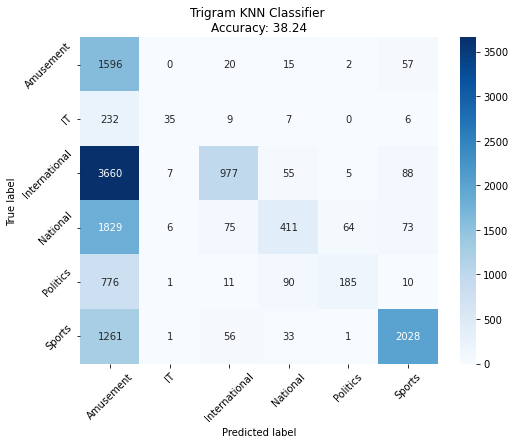

In [ ]:
cm = confusion_matrix(y_test, pred_y) 
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     
                     index = ['Amusement' ,'IT' ,'International', 'National', 'Politics', 'Sports'], 
                     columns = ['Amusement' ,'IT' ,'International', 'National', 'Politics', 'Sports'])

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,cmap="Blues", fmt='g')
plt.title('Trigram KNN Classifier \nAccuracy: {0:.2f}'.format(accuracy_score(y_test, pred_y)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

In [ ]:
report = pd.DataFrame(classification_report(y_true = y_test, y_pred = pred_y, output_dict=True)).transpose()
report = report.rename(index={'0': 'Amusement','1':'IT','2':'International','3':'National','4':'Politics','5':'Sports'})
report[['precision','recall','f1-score']]=report[['precision','recall','f1-score']].apply(lambda x: round(x*100,2))
report

,precision,recall,f1-score,support
Amusement,17.06,94.44,28.90,1690.0000
IT,70.00,12.11,20.65,289.0000
International,85.10,20.39,32.90,4792.0000
National,67.27,16.72,26.78,2458.0000
Politics,71.98,17.24,27.82,1073.0000
Sports,89.66,60.00,71.89,3380.0000
accuracy,38.24,38.24,38.24,0.3824
macro avg,66.85,36.82,34.82,13682.0000
weighted avg,73.27,38.24,40.28,13682.0000


**01.05 Linear Support Vector Machine**

In [ ]:
lsvm_model = SVC(kernel = 'linear',C = 0.2, probability=True, random_state = 0)
lsvm_model.fit(X_train,y_train)
pred_y = lsvm_model.predict(X_test)

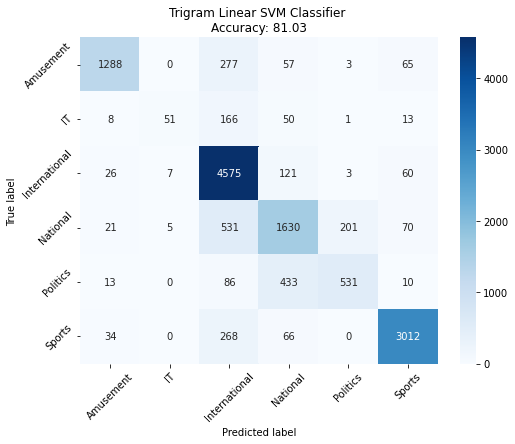

In [ ]:
cm = confusion_matrix(y_test, pred_y) 
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     
                     index = ['Amusement' ,'IT' ,'International', 'National', 'Politics', 'Sports'], 
                     columns = ['Amusement' ,'IT' ,'International', 'National', 'Politics', 'Sports'])

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,cmap="Blues", fmt='g')
plt.title('Trigram Linear SVM Classifier \nAccuracy: {0:.2f}'.format(accuracy_score(y_test, pred_y)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

In [ ]:
report = pd.DataFrame(classification_report(y_true = y_test, y_pred = pred_y, output_dict=True)).transpose()
report = report.rename(index={'0': 'Amusement','1':'IT','2':'International','3':'National','4':'Politics','5':'Sports'})
report[['precision','recall','f1-score']]=report[['precision','recall','f1-score']].apply(lambda x: round(x*100,2))
report

,precision,recall,f1-score,support
Amusement,92.66,76.21,83.64,1690.000000
IT,80.95,17.65,28.98,289.000000
International,77.50,95.47,85.55,4792.000000
National,69.16,66.31,67.71,2458.000000
Politics,71.85,49.49,58.61,1073.000000
Sports,93.25,89.11,91.13,3380.000000
accuracy,81.03,81.03,81.03,0.810335
macro avg,80.90,65.71,69.27,13682.000000
weighted avg,81.40,81.03,80.18,13682.000000


**01.06 RBF Support Vector Machine**

In [11]:
ksvm_model = SVC(C= 1000,kernel = 'rbf',probability=True, gamma = 0.00015, random_state = 0)
ksvm_model.fit(X_train,y_train)
pred_y = ksvm_model.predict(X_test)

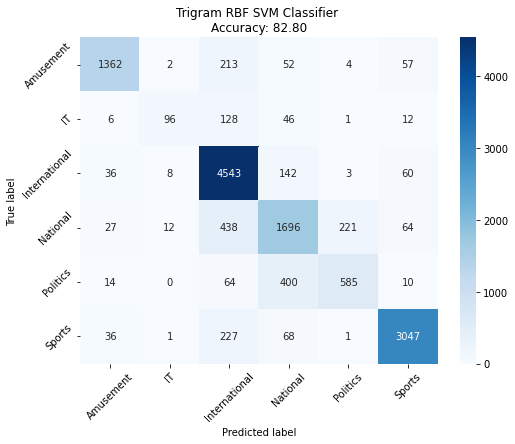

In [12]:
cm = confusion_matrix(y_test, pred_y) 
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     
                     index = ['Amusement' ,'IT' ,'International', 'National', 'Politics', 'Sports'], 
                     columns = ['Amusement' ,'IT' ,'International', 'National', 'Politics', 'Sports'])

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,cmap="Blues", fmt='g')
plt.title('Trigram RBF SVM Classifier \nAccuracy: {0:.2f}'.format(accuracy_score(y_test, pred_y)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

In [13]:
report = pd.DataFrame(classification_report(y_true = y_test, y_pred = pred_y, output_dict=True)).transpose()
report = report.rename(index={'0': 'Amusement','1':'IT','2':'International','3':'National','4':'Politics','5':'Sports'})
report[['precision','recall','f1-score']]=report[['precision','recall','f1-score']].apply(lambda x: round(x*100,2))
report

,precision,recall,f1-score,support
Amusement,91.96,80.59,85.90,1690.000000
IT,80.67,33.22,47.06,289.000000
International,80.94,94.80,87.32,4792.000000
National,70.55,69.00,69.77,2458.000000
Politics,71.78,54.52,61.97,1073.000000
Sports,93.75,90.15,91.92,3380.000000
accuracy,82.80,82.80,82.80,0.828022
macro avg,81.61,70.38,73.99,13682.000000
weighted avg,82.88,82.80,82.29,13682.000000
